<a href="https://colab.research.google.com/github/Sumanasumithra04/Thyroid-Detection-Predictor-App-using-Streamlit/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight
import warnings

warnings.filterwarnings('ignore')

In [126]:
# open the csv file
training_df = pd.read_csv('/content/Train_Data_Value.csv')

In [127]:
training_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,70.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,3.0,1.8,95.0,1.00,95.0,0
1,78.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.9,1.7,104.0,0.76,137.0,0
2,50.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,3.0,0.0,106.0,1.07,99.0,0
3,44.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.2,1.7,92.0,0.98,94.0,0
4,64.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,2.2,0.0,111.0,0.97,114.0,0


In [128]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5356 non-null   float64
 1   sex                  5356 non-null   float64
 2   on_thyroxine         5356 non-null   int64  
 3   query_on_thyroxine   5356 non-null   int64  
 4   on_antithyroid_meds  5356 non-null   int64  
 5   sick                 5356 non-null   int64  
 6   pregnant             5356 non-null   int64  
 7   thyroid_surgery      5356 non-null   int64  
 8   I131_treatment       5356 non-null   int64  
 9   query_hypothyroid    5356 non-null   int64  
 10  query_hyperthyroid   5356 non-null   int64  
 11  lithium              5356 non-null   int64  
 12  goitre               5356 non-null   int64  
 13  tumor                5356 non-null   int64  
 14  hypopituitary        5356 non-null   int64  
 15  psych                5356 non-null   i

In [129]:
training_df.isna().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [130]:
training_df.shape

(5356, 22)

In [131]:
training_df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [132]:
target= training_df['target']
training_df.drop(columns=['target'], inplace=True)

### Data cleaning and analysis


In [133]:
training_df['age'].unique()

array([70., 78., 50., 44., 64., 25., 23., 27., 30., 36., 51., 39., 54.,
       49., 45., 46., 66., 52., 47., 69., 65., 28., 33., 37., 79., 61.,
       60., 73., 57., 76., 40., 48., 26., 41., 58., 59., 71., 24., 68.,
       75., 62., 63., 32., 53., 19., 74., 81., 87., 43., 29., 84., 72.,
       31., 20., 67., 34., 55., 22.,  2., 21., 35., 16., 18., 38., 83.,
       88., 86., 56., 77., 80., 42., 15.,  1., 10., 85., 82., 13., 14.,
       17., 89.,  6., 90., 11., 91., 92.,  3.,  7.,  5., 93., 12.,  8.,
        9., 97., 94., 95.])

In [134]:
training_df.isin(['?']).sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [135]:
# cat_col= training_df[['age','sex']]

# fig ,axes = plt.subplots(len(cat_col.columns),1, figsize=(10,100))
# j = 0
# for i in range(len(cat_col.columns)):
#     plt.sca(axes[i])
#     sns.countplot(x= cat_col[cat_col.columns[i]])
#     plt.xticks(rotation = 45)
#     ticks = range(0, 50, 5)
#     labels = ticks
#     plt.xticks(ticks, labels)

In [136]:
training_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5356 non-null   float64
 1   sex                  5356 non-null   float64
 2   on_thyroxine         5356 non-null   int64  
 3   query_on_thyroxine   5356 non-null   int64  
 4   on_antithyroid_meds  5356 non-null   int64  
 5   sick                 5356 non-null   int64  
 6   pregnant             5356 non-null   int64  
 7   thyroid_surgery      5356 non-null   int64  
 8   I131_treatment       5356 non-null   int64  
 9   query_hypothyroid    5356 non-null   int64  
 10  query_hyperthyroid   5356 non-null   int64  
 11  lithium              5356 non-null   int64  
 12  goitre               5356 non-null   int64  
 13  tumor                5356 non-null   int64  
 14  hypopituitary        5356 non-null   int64  
 15  psych                5356 non-null   i

### Feature Selection

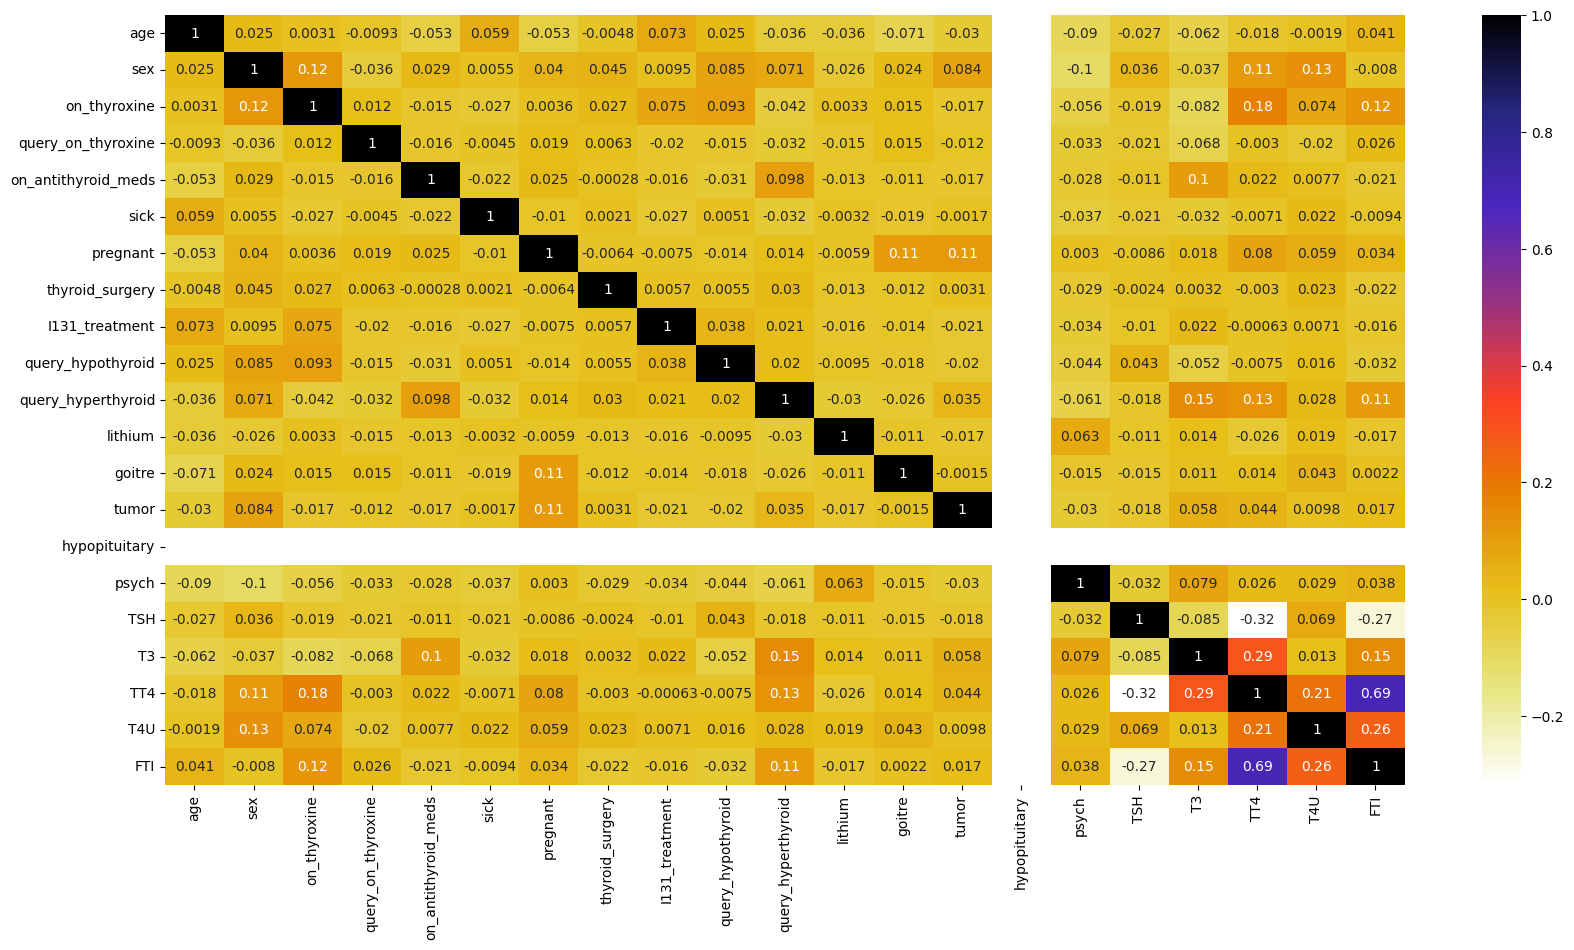

In [137]:
#using correlation method
plt.figure(figsize=(20,10))
cor = training_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [138]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(training_df, 0.60)#based on heatmap observation thershod is 0.80
print('columns which are highly correlated with each other', corr_features)

columns which are highly correlated with each other {'FTI'}


####

In [139]:
training_data = training_df.drop(list(corr_features),axis =1)

## model training

In [140]:
x_train,x_test,y_train,y_test = train_test_split(training_data,target,test_size = 0.3,random_state = 42)

In [141]:
x_train.shape

(3749, 20)

### class Balance using SMOTE Oversampling Technique

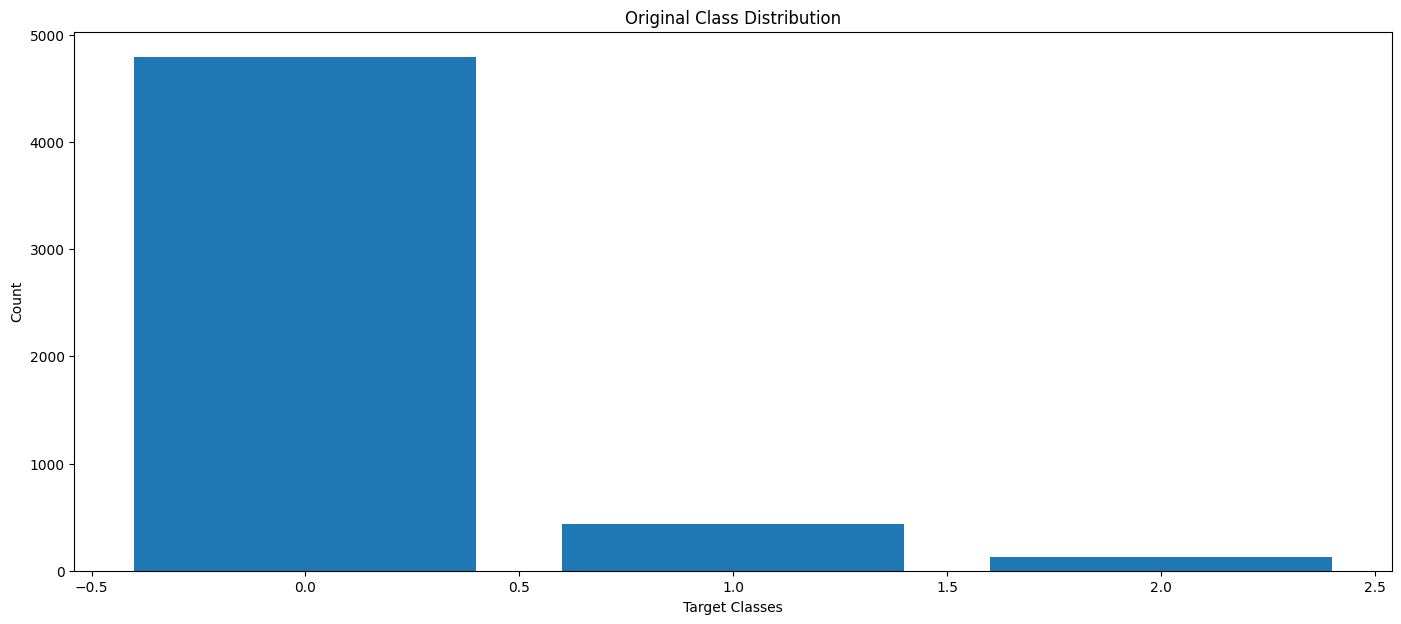

In [142]:
from collections import Counter

class_counts = Counter(target)

plt.figure(figsize=(17,7))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Original Class Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.show()


In [143]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String
x_train, y_train = ros.fit_resample(x_train, y_train)
y_train_ros = pd.DataFrame(y_train)
y_train_ros.value_counts()

,count
target,
0,3351
1,3351
2,3351


In [144]:
x_train.shape

(10053, 20)

In [145]:

models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(99)
    model_scores = {}

    for name, model in models.items():
        print(f" Model: {name}")
        print("Default Parameters:")
        print(model.get_params())  # Print default parameters

        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        print(f"Accuracy: {model_scores[name]:.4f}")

    return model_scores

fit_and_score(models, x_train, x_test, y_train, y_test)


 Model: KNeighborsClassifier
Default Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.9452
 Model: RandomForestClassifier
Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9844
 Model: DecisionTree
Default Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 

{'KNeighborsClassifier': 0.9452395768512757,
 'RandomForestClassifier': 0.984443061605476,
 'DecisionTree': 0.9807093963907902,
 'XGBoost': 0.984443061605476}

In [146]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best score: 0.9956231970556052


In [147]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=param_dist,
    n_iter=20,  # number of random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'learning_rate': np.float64(0.1784569549189997), 'max_depth': 6, 'n_estimators': 261, 'subsample': np.float64(0.8185450708005443)}


### FinalParamter
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [148]:

clf = xgb.XGBClassifier(
    learning_rate=0.2,   # How fast the model learns (lower = slower but more precise)
    max_depth=5,         # Maximum depth of trees
    n_estimators=100,    # Number of boosting rounds (trees)
    subsample=1.0
)

In [149]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evalutation

In [150]:
y_pred_proba = clf.predict_proba(x_test)
y_pred = clf.predict(x_test)

In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
# --- Accuracy ---
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9844

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1437
           1       0.95      0.99      0.97       130
           2       0.73      0.90      0.81        40

    accuracy                           0.98      1607
   macro avg       0.89      0.96      0.92      1607
weighted avg       0.99      0.98      0.98      1607



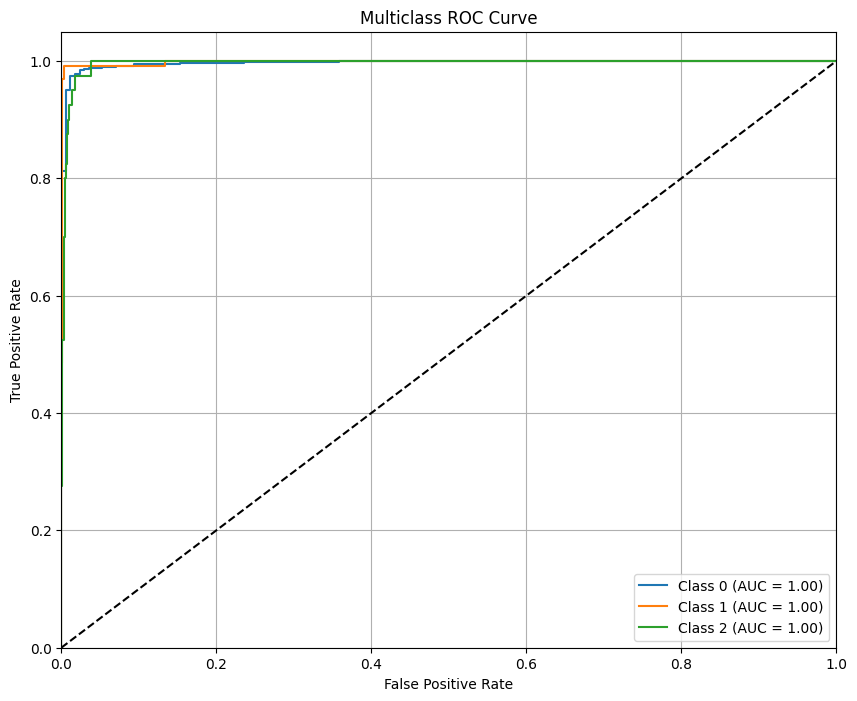

In [152]:

# --- ROC Curve & AUC (Multiclass) ---
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10,8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


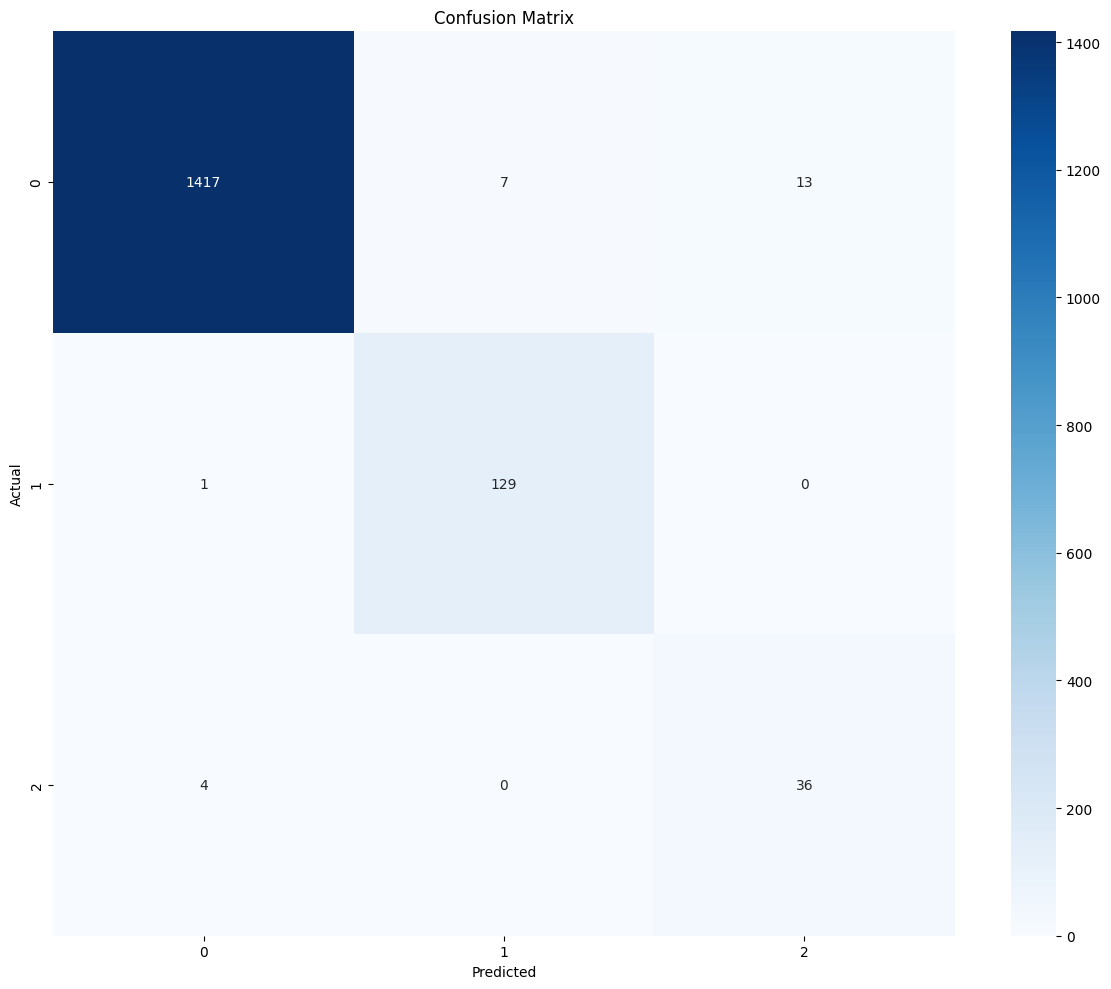

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Set custom size BEFORE plotting
plt.figure(figsize=(12, 10))  # Adjust width and height here

# Now plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Titles and labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


### testing with unseen dataset

In [201]:
test_df = pd.read_csv('/content/Test_Data_Value.csv')

In [202]:
test_df['expected_target'] = test_df['target']

In [203]:
test_df.drop(columns=['target'], inplace=True)

In [204]:
test_df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,expected_target
0,60.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.48,1.7,88.0,0.83,105.0,0
1,53.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.00,0.0,78.0,0.85,91.0,0
2,77.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.10,1.9,100.0,0.98,102.0,0
3,69.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.10,0.0,110.0,1.02,108.0,0
4,89.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,1.5,120.0,0.92,130.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,21.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.40,1.6,95.0,0.93,102.0,0
1782,59.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.15,1.9,143.0,1.00,143.0,0
1783,71.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,3.60,1.7,89.0,1.04,86.0,0
1784,28.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.90,1.7,83.0,0.00,0.0,0


In [205]:
test_df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'expected_target'],
      dtype='object')

In [206]:
def predict_val(row):
  row = row.to_dict()
  # print(row)
  row.pop('FTI')
  target_value = int(row['expected_target'])
  row.pop('expected_target')
  sample_df = pd.DataFrame([row])
  test = sample_df.to_numpy().reshape(1,-1)
  predicts = clf.predict(test)
  result = ''.join(map(str, predicts))
  # predicts.__dir__()
  # print(predicts)
  # row['predicted_value'] = predicts
  # print(result)
  status = False
  if str(target_value) == str(result):
    status = True

  return result, status

test_df[['predicted_value', 'status']] = test_df.apply(lambda x: pd.Series(predict_val(x)), axis=1)


In [213]:
test_df.shape

(1786, 24)

In [214]:
test_df['status'].value_counts()

,count
status,
True,1761
False,25


## save model

In [215]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)